In [100]:
# import the SARIMAX and other modules

from statsmodels.tsa.statespace.sarimax import SARIMAX # provides ARMA, ARIMA, SARIMA models
from statsmodels.tsa.stattools import adfuller # test for stationarity using dicky-fuller test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10, 6)


In [101]:
# read data in a pandas dataframe
df = pd.read_csv('/data/AMAZON_stock.csv')
df.shape

(1259, 7)

In [102]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1249,2022-05-05,2460.000000,2469.979980,2301.449951,2328.139893,2328.139893,7219600
1250,2022-05-06,2297.000000,2381.010010,2261.629883,2295.449951,2295.449951,6206700
1251,2022-05-09,2226.250000,2280.000000,2159.139893,2175.780029,2175.780029,6406200
1252,2022-05-10,2225.000000,2252.850098,2143.419922,2177.179932,2177.179932,5271700
1253,2022-05-11,2162.070068,2203.120117,2088.570068,2107.439941,2107.439941,5485200
1254,2022-05-12,2055.000000,2215.610107,2048.110107,2138.610107,2138.610107,6601300
1255,2022-05-13,2181.379883,2263.679932,2156.000000,2261.100098,2261.100098,4676700
1256,2022-05-16,2262.000000,2279.850098,2207.080078,2216.209961,2216.209961,3728300
1257,2022-05-17,2265.500000,2316.000000,2225.530029,2307.370117,2307.370117,3822400
1258,2022-05-18,2228.790039,2257.060059,2124.979980,2142.250000,2142.250000,5404100


## Test for stationarity
Augmented Dicky-Fuller test:</br>
test statistic: stationary series are likely to have higher negative values </br>
null -hypothesis: presence of unit root (non-stationary) </br>


In [103]:
# check stationarity using the function imported earlier
result = adfuller(df['Close'])

# Print test statistic
print('statistic:', result[0],'\n', 'p-value:', result[1])

statistic: -1.567330798200027 
 p-value: 0.4999804069946778


## Make the series stationary

In [104]:
# make a new column with logarithmic values closing price
df['log_close'] = np.log(df['Close'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,log_close
0,2017-05-19,962.840027,968.919983,959.719971,959.840027,959.840027,3972100,6.866767
1,2017-05-22,964.000000,971.380005,962.900024,970.669983,970.669983,2642200,6.877987
2,2017-05-23,975.020020,975.200012,966.849976,971.539978,971.539978,2415600,6.878882
3,2017-05-24,976.000000,981.000000,970.229980,980.349976,980.349976,2446000,6.887910
4,2017-05-25,984.849976,999.000000,982.109985,993.380005,993.380005,4822000,6.901113


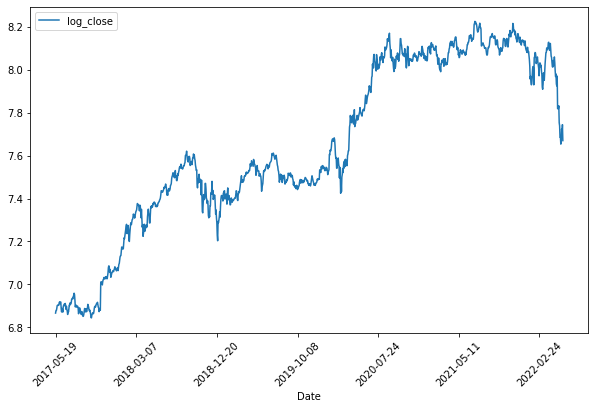

In [105]:
# plot the log close price column
df.plot(x='Date', y= 'log_close')
plt.xticks(rotation=45)
plt.show()

In [106]:
# conduct stationarity test again
result = adfuller(df['log_close'])

# Print test statistic
print('statistic:', result[0],'\n', 'p-value:', result[1])

statistic: -1.8878019728567952 
 p-value: 0.33782102619716226


In [107]:
# make stationary using series differencing
amazon= df[['Date', 'log_close']]  # new dataframe with selected columns only
amazon_sarimax = df[['Date','log_close']]
amazon['diff_log_close'] = amazon['log_close'].diff().dropna()  
amazon_diff = amazon[['Date','diff_log_close']] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [108]:
# process the dataframes for different models
amazon_sarimax = df[['Date','log_close']]
amazon_prophet = df[['Date','log_close']]
amazon.drop('diff_log_close', axis=1, inplace=True)
amazon.set_index('Date', inplace=True)  # set the date column as index
amazon_diff.set_index('Date', inplace=True)
amazon_diff.dropna(inplace=True)
amazon_diff

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,diff_log_close
Date,
2017-05-22,0.011220
2017-05-23,0.000896
2017-05-24,0.009027
2017-05-25,0.013204
2017-05-26,0.002413
...,...
2022-05-12,0.014682
2022-05-13,0.055695
2022-05-16,-0.020053


In [109]:
# conduct stationarity test again
result = adfuller(amazon_diff['diff_log_close'])

# Print test statistic
print('statistic:', result[0],'\n', 'p-value:', result[1])

# Print test statistic
print('p-value:', np.round(result[1], 5))

statistic: -12.845118815143895 
 p-value: 5.501179656062845e-24
p-value: 0.0


p- value < 0.05 : rejects the null hypothesis

## Fit ARMA model

In [110]:
# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:         diff_log_close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood                3098.433
Date:                Sun, 22 May 2022   AIC                          -6186.866
Time:                        16:20:28   BIC                          -6161.179
Sample:                             0   HQIC                         -6177.212
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0580      1.334     -0.044      0.965      -2.673       2.556
ar.L2          0.2811      0.506      0.555      0.579      -0.711       1.273
ma.L1          0.0002      1.331      0.000      1.0

In [111]:
# use arma model to predict the stock price for the next 30 days
arma_diff_forecast = arma_results.get_forecast(steps=30).predicted_mean 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [112]:
arma_int_forecast = np.cumsum(arma_diff_forecast)

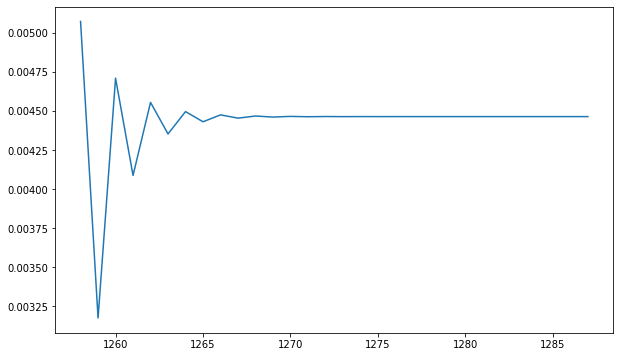

In [113]:
plt.plot(arma_int_forecast)

In [114]:
# addd this cumsum to the last value of the original time series
arma_value_forecast = arma_int_forecast + df[['log_close']].iloc[-1,0]

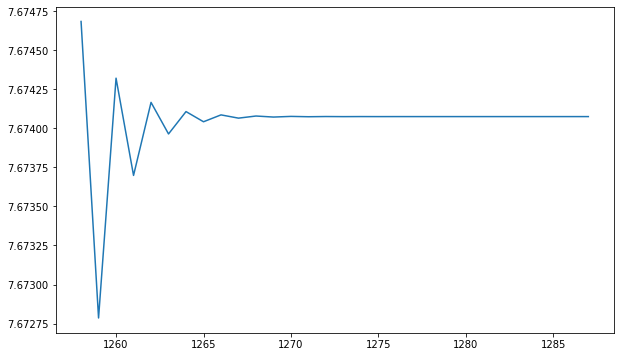

In [115]:
plt.plot(arma_value_forecast)

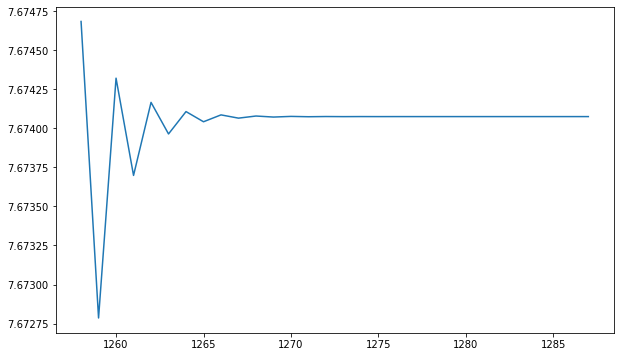

In [116]:
plt.plot(arma_value_forecast)

In [117]:
# Make arma forecast of next 30 differences
arma_diff_forecast = arma_results.get_forecast(steps=30).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [118]:
amazon.iloc[-1,0]

7.669611957549228

In [119]:
# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

1258    7.674685
1259    7.672786
1260    7.674322
1261    7.673699
1262    7.674167
1263    7.673964
1264    7.674108
1265    7.674043
1266    7.674087
1267    7.674066
1268    7.674079
1269    7.674073
1270    7.674077
1271    7.674075
1272    7.674076
1273    7.674075
1274    7.674076
1275    7.674076
1276    7.674076
1277    7.674076
1278    7.674076
1279    7.674076
1280    7.674076
1281    7.674076
1282    7.674076
1283    7.674076
1284    7.674076
1285    7.674076
1286    7.674076
1287    7.674076
dtype: float64


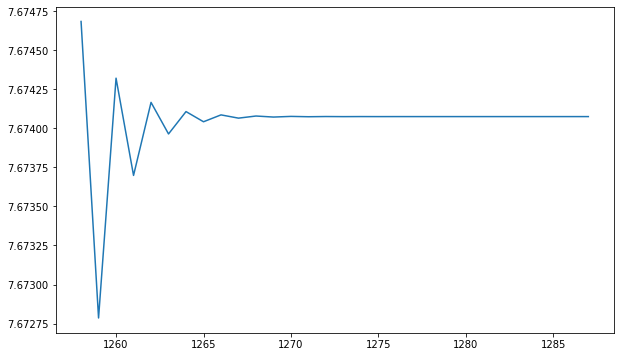

In [120]:
plt.plot(arma_value_forecast)

# Fit ARIMA model</br>
- helps to avoid the differencing and cumsum reversion

In [121]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(amazon, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=30).predicted_mean

# Print forecast
print(arima_value_forecast)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1259    7.674685
1260    7.672786
1261    7.674322
1262    7.673699
1263    7.674167
1264    7.673964
1265    7.674108
1266    7.674043
1267    7.674087
1268    7.674066
1269    7.674079
1270    7.674073
1271    7.674077
1272    7.674075
1273    7.674076
1274    7.674075
1275    7.674076
1276    7.674076
1277    7.674076
1278    7.674076
1279    7.674076
1280    7.674076
1281    7.674076
1282    7.674076
1283    7.674076
1284    7.674076
1285    7.674076
1286    7.674076
1287    7.674076
1288    7.674076
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


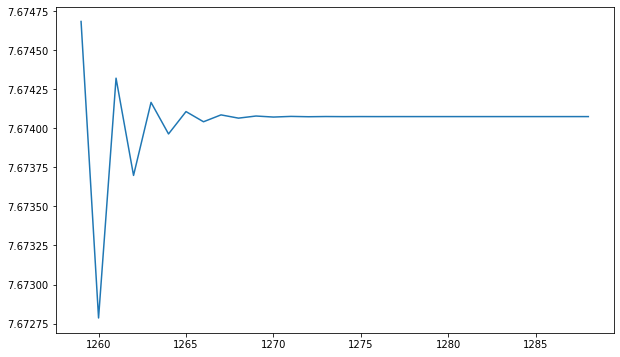

In [122]:
plt.plot(arima_value_forecast)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


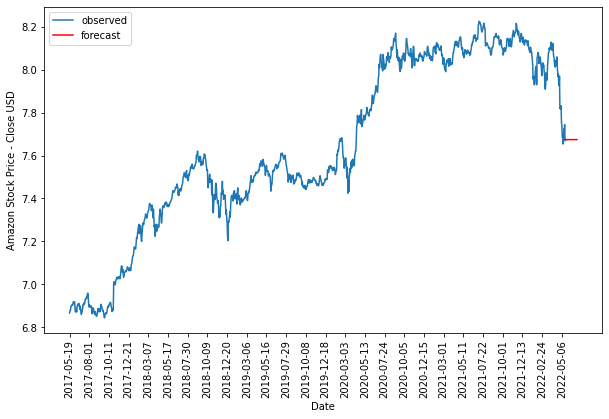

In [123]:
# plot the amazon data
plt.figure(figsize=(10,6))
plt.plot(amazon.index, amazon, label='observed')
# plot your mean predictions
plt.plot(arima_value_forecast.index, arima_value_forecast, color='r', label='forecast')
# set labels, legends and show plot
plt.xlabel('Date')
plt.xticks(amazon.index[::50],  rotation='vertical')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

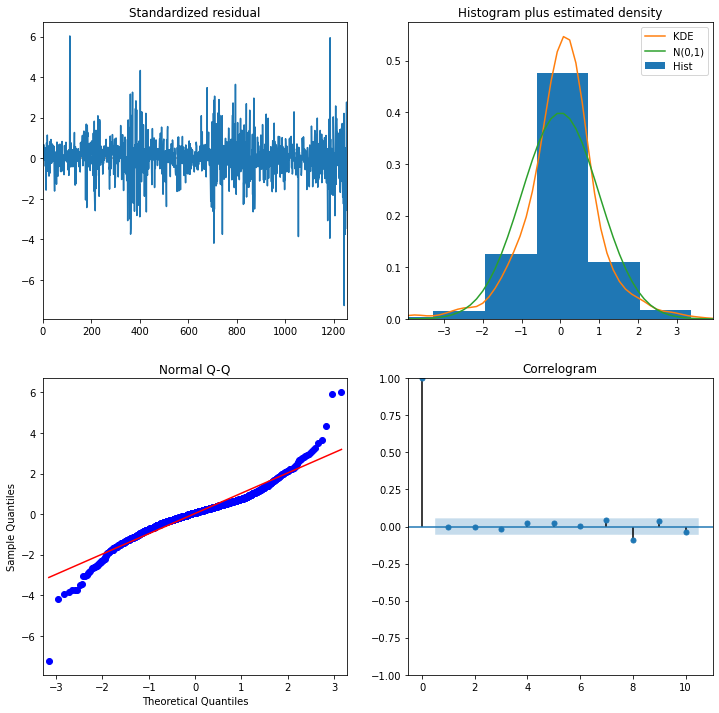

In [124]:
# Create the 4 diagostics plots
plt.rcParams['figure.figsize']=(12, 12)
arima_results.plot_diagnostics()
plt.show()

In [125]:
# model diagnostics

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(arima_results.resid))

# Print mean absolute error
print(mae)

0.019707704913969146


## Fit a SARIMA model </br>
- takes care of seasonality


In [126]:
amazon

,log_close
Date,
2017-05-19,6.866767
2017-05-22,6.877987
2017-05-23,6.878882
2017-05-24,6.887910
2017-05-25,6.901113
...,...
2022-05-12,7.667911
2022-05-13,7.723607
2022-05-16,7.703554


In [127]:
amazon_sarimax['Date'] = pd.to_datetime(amazon_sarimax['Date'])
amazon_sarimax = amazon_sarimax.set_index('Date')
amazon_sarimax.dropna(inplace=True)
amazon_sarimax = amazon_sarimax.asfreq('D')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
# Create a SARIMA model
model = SARIMAX(amazon, order=(1,0,0), seasonal_order=(1,1,0,7))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                
Dep. Variable:                         log_close   No. Observations:                 1259
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                2874.096
Date:                           Sun, 22 May 2022   AIC                          -5742.191
Time:                                   16:20:34   BIC                          -5726.794
Sample:                                        0   HQIC                         -5736.403
                                          - 1259                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9083      0.008    109.622      0.000       0.892       0.925
ar.S.L7       -0.4645      0.019    -23.826

In [129]:
sarima_forecast = results.get_forecast(steps=30).predicted_mean
sarima_forecast 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


1259    7.613177
1260    7.608863
1261    7.626980
1262    7.673175
1263    7.635136
1264    7.658527
1265    7.601501
1266    7.578488
1267    7.567330
1268    7.589550
1269    7.645335
1270    7.620352
1271    7.655873
1272    7.594724
1273    7.559710
1274    7.554931
1275    7.578152
1276    7.632122
1277    7.603472
1278    7.635537
1279    7.578281
1280    7.550638
1281    7.544528
1282    7.568767
1283    7.624926
1284    7.599202
1285    7.633983
1286    7.575928
1287    7.545777
1288    7.541118
dtype: float64

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


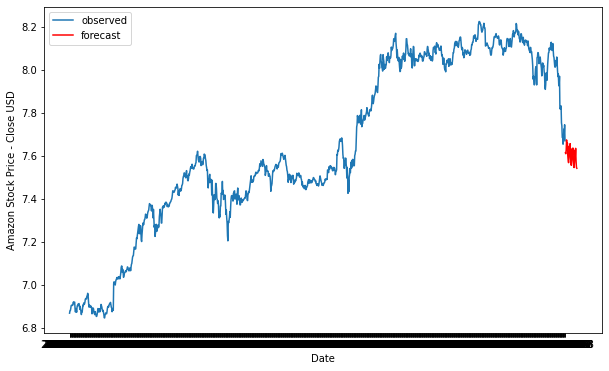

In [130]:
# plot the amazon data
plt.figure(figsize=(10,6))
plt.plot(amazon.index, amazon, label='observed')
# plot your mean predictions
plt.plot(sarima_forecast.index, sarima_forecast, color='r', label='forecast')
# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

## intuitive model selection</br>
- autocorrelation function and cumulative autocorrelation function plots help

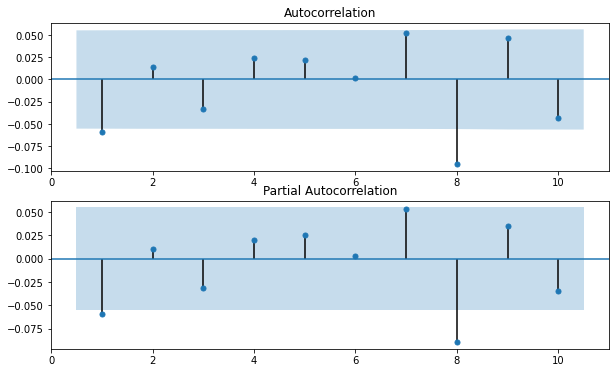

In [131]:
# import autocorrelation function and partial autocorrelation function plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,6)) 

# plot acf
plot_acf(amazon_diff, lags=10, zero=False, ax= ax1)

# plot acf
plot_pacf(amazon_diff, lags=10, zero=False, ax = ax2)

plt.show()

## comparing models </br>
- use AIC and BIC

In [132]:
amazon.index = pd.DatetimeIndex(amazon.index).to_period('D')

In [133]:
# Loop over p and q values from 0-3
for p in range(3):
    for q in range(3):
      try:
            model = SARIMAX(amazon, order=(p,1,q))
            results = model.fit()
            print(p, q, np.round(results.aic, 2), np.round(results.bic,2))
      except:
            print(p, q, None, None)    

0 0 -6189.92 -6184.78
0 1 -6192.07 -6181.8
0 2 -6190.23 -6174.81
1 0 -6192.17 -6181.9
1 1 -6190.7 -6175.29
1 2 -6188.64 -6168.09
2 0 -6190.34 -6174.93


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 1 -6188.32 -6167.77
2 2 -6186.87 -6161.18


## Box-Jenkins method: </br>

- identification 
- estimation 
- model diagnostics

# Prophet base Model

In [134]:
# inspect the data
amazon_prophet.head()

,Date,log_close
0,2017-05-19,6.866767
1,2017-05-22,6.877987
2,2017-05-23,6.878882
3,2017-05-24,6.887910
4,2017-05-25,6.901113


In [135]:
# rename the dataframe columns
amazon_prophet.columns = ['ds', 'y']
amazon_prophet.head()

,ds,y
0,2017-05-19,6.866767
1,2017-05-22,6.877987
2,2017-05-23,6.878882
3,2017-05-24,6.887910
4,2017-05-25,6.901113


In [136]:
# install the prophet package
!pip install prophet

In [137]:
# import the prophet package
from prophet import Prophet

In [138]:
# instantiate the prophet model
m = Prophet()

In [139]:
# fit the model to the time series data
m.fit(amazon_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [140]:
future = m.make_future_dataframe(periods=30) # make future dataframe

In [141]:
# make forecast for the future
forecast = m.predict(future)

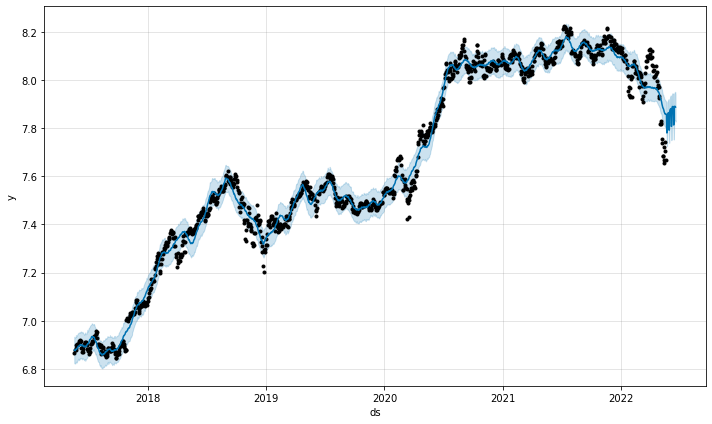

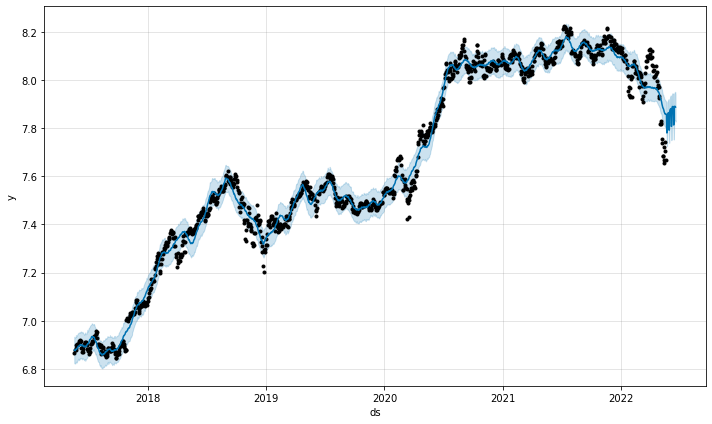

In [142]:
# plot the forecast
m.plot(forecast)

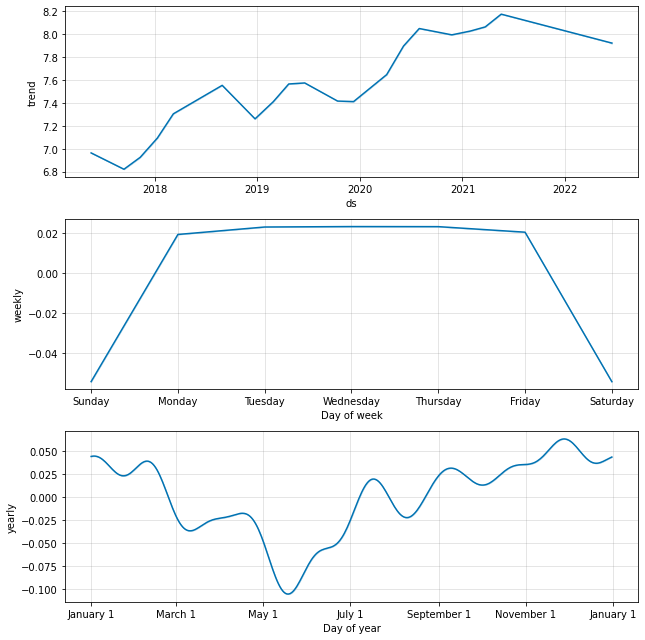

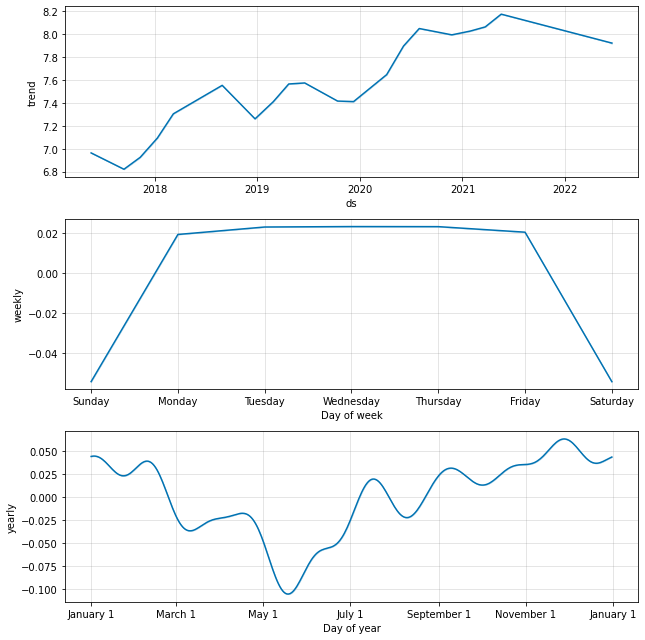

In [143]:
# component plots
m.plot_components(forecast)